In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [35]:
train_df = pd.read_csv("fire_risk_train.csv")
test_df = pd.read_csv("fire_risk_test.csv")

train_df.head()

,temperature_C,humidity_percent,wind_speed_kmph,air_quality_index,vegetation_index,emergency_response_time_min,fire_risk_score,fire_risk_level,random_noise
0,19.939478,14.613031,3.309713,51.580079,0.882388,2.426881,36.298824,Low,-1.349549
1,18.871172,45.988347,2.928750,54.831865,0.661799,3.573987,41.477312,Medium,-0.042336
2,20.003489,10.000000,1.009550,62.969945,0.348045,2.022868,39.487676,Low,-1.128474
3,17.908171,65.904458,3.521618,52.246847,0.400091,2.932591,43.355859,Medium,0.113624
4,28.292721,30.808170,4.020409,52.858654,0.403075,2.334457,55.468398,Medium,0.264644


In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   temperature_C                240 non-null    float64
 1   humidity_percent             240 non-null    float64
 2   wind_speed_kmph              240 non-null    float64
 3   air_quality_index            240 non-null    float64
 4   vegetation_index             240 non-null    float64
 5   emergency_response_time_min  240 non-null    float64
 6   fire_risk_score              240 non-null    float64
 7   fire_risk_level              240 non-null    object 
 8   random_noise                 240 non-null    float64
dtypes: float64(8), object(1)
memory usage: 17.0+ KB


In [37]:
train_df.describe()

,temperature_C,humidity_percent,wind_speed_kmph,air_quality_index,vegetation_index,emergency_response_time_min,fire_risk_score,random_noise
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,24.714115,42.345465,1.584467,57.192693,0.486772,2.767678,46.985133,-0.041833
std,4.954335,13.139747,1.229044,5.983645,0.247935,0.561474,14.425230,1.023875
min,8.793663,10.000000,0.031158,50.051135,0.000000,2.003046,0.000000,-3.386814
25%,21.601355,32.194560,0.606005,52.024670,0.297803,2.351371,38.086297,-0.731043
50%,24.735913,41.841401,1.302957,55.672464,0.480790,2.608190,47.792465,-0.029330
75%,28.183383,50.238119,2.219598,61.104317,0.663488,3.125123,55.481380,0.589786
max,37.634662,78.600397,5.697085,76.197451,1.000000,4.579709,88.720877,2.434409


In [38]:
train_df.isnull().sum()

temperature_C                  0
humidity_percent               0
wind_speed_kmph                0
air_quality_index              0
vegetation_index               0
emergency_response_time_min    0
fire_risk_score                0
fire_risk_level                0
random_noise                   0
dtype: int64

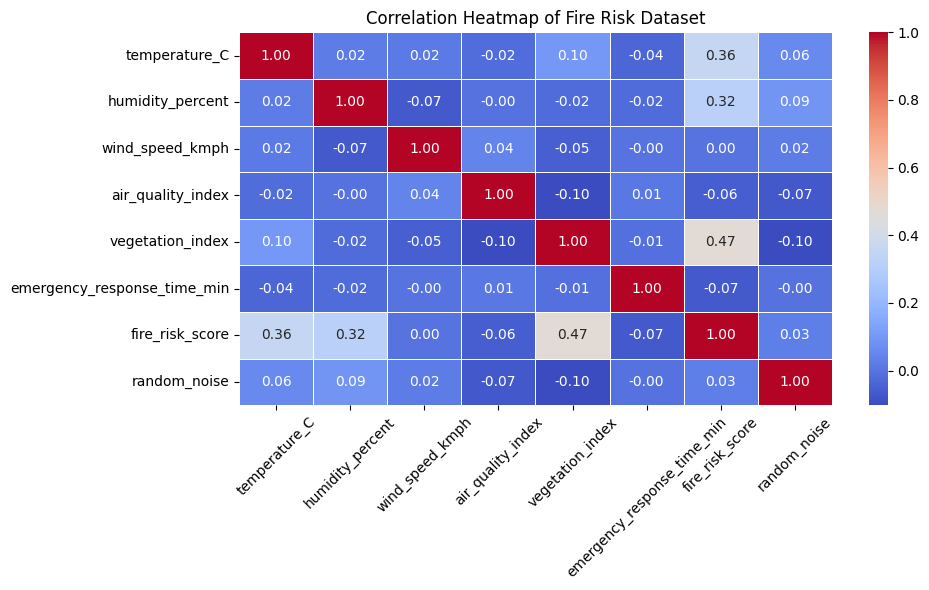

In [39]:
corr_matrix = train_df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(
    corr_matrix,
    annot=True,          # show correlation values
    cmap="coolwarm",     # color style
    fmt=".2f",           # 2 decimal places
    linewidths=0.5
)

plt.title("Correlation Heatmap of Fire Risk Dataset")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



In [40]:
# Feature (Independent variable)
X = train_df[["vegetation_index"]]

# Target (Dependent variable)
y = train_df["fire_risk_score"]


In [41]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [42]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [43]:
y_pred = model.predict(X_val)


In [44]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)

print("Simple Linear Regression using vegetation_index")
print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)


Simple Linear Regression using vegetation_index
RMSE: 11.618970288016486
MAE: 9.51990832644374
MSE: 135.0004705538099


In [45]:
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

Intercept: 32.31921065442035
Coefficient: 29.607499025944385


In [46]:
y = train_df["fire_risk_score"]

# Remove target and categorical column
X = train_df.drop(["fire_risk_score", "fire_risk_level"], axis=1)

X.head()

,temperature_C,humidity_percent,wind_speed_kmph,air_quality_index,vegetation_index,emergency_response_time_min,random_noise
0,19.939478,14.613031,3.309713,51.580079,0.882388,2.426881,-1.349549
1,18.871172,45.988347,2.928750,54.831865,0.661799,3.573987,-0.042336
2,20.003489,10.000000,1.009550,62.969945,0.348045,2.022868,-1.128474
3,17.908171,65.904458,3.521618,52.246847,0.400091,2.932591,0.113624
4,28.292721,30.808170,4.020409,52.858654,0.403075,2.334457,0.264644


In [47]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [48]:
simple_model = LinearRegression()
simple_model.fit(X_train[["temperature_C"]], y_train)

y_pred_simple = simple_model.predict(X_val[["temperature_C"]])

In [49]:
rmse_simple = np.sqrt(mean_squared_error(y_val, y_pred_simple))
mae_simple = mean_absolute_error(y_val, y_pred_simple)
mse_simple = mean_squared_error(y_val, y_pred_simple)

print("Simple Linear Regression Results")
print("RMSE:", rmse_simple)
print("MAE:", mae_simple)
print("MSE:", mse_simple)

Simple Linear Regression Results
RMSE: 12.579630232771896
MAE: 10.203054443447057
MSE: 158.24709679326872


In [50]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [51]:
multi_model = LinearRegression()
multi_model.fit(X_train_scaled, y_train)

y_pred_multi = multi_model.predict(X_val_scaled)

In [52]:
rmse_multi = np.sqrt(mean_squared_error(y_val, y_pred_multi))
mae_multi = mean_absolute_error(y_val, y_pred_multi)
mse_multi = mean_squared_error(y_val, y_pred_multi)

print("Multiple Linear Regression Results")
print("RMSE:", rmse_multi)
print("MAE:", mae_multi)
print("MSE:", mse_multi)

Multiple Linear Regression Results
RMSE: 10.789663505070992
MAE: 9.36133870445097
MSE: 116.41683855266085


In [53]:
# Scale full dataset
X_scaled = scaler.fit_transform(X)

# Train final model
multi_model.fit(X_scaled, y)

LinearRegression()

In [54]:
# Ensure same feature order
test_features = test_df[X.columns]

test_scaled = scaler.transform(test_features)

test_predictions = multi_model.predict(test_scaled)

test_df["predicted_fire_risk_score"] = test_predictions

test_df.head()

,temperature_C,humidity_percent,wind_speed_kmph,air_quality_index,vegetation_index,emergency_response_time_min,random_noise,predicted_fire_risk_score
0,28.684219,39.679491,0.562655,74.242403,0.313197,2.884045,-0.089225,44.243666
1,29.415549,44.846189,0.155674,52.918113,0.436912,3.563191,0.744584,49.477331
2,25.664848,33.303496,1.400242,60.736317,0.548522,3.026515,1.247811,46.356614
3,23.676716,44.150362,5.440338,50.130019,0.706796,3.453534,0.666166,53.853256
4,27.454875,37.493174,1.469756,52.486911,0.570645,3.607346,-0.844279,48.675878


In [55]:
test_df.to_csv("fire_risk_predictions.csv", index=False)

In [56]:
def predict_fire_risk(temp, humidity, wind, aqi, vegetation, response_time, noise):
    
    input_data = np.array([[temp, humidity, wind, aqi, vegetation, response_time, noise]])
    
    input_scaled = scaler.transform(input_data)
    
    prediction = multi_model.predict(input_scaled)
    
    return prediction[0]


# Example
predict_fire_risk(
    temp=35,
    humidity=40,
    wind=15,
    aqi=120,
    vegetation=0.6,
    response_time=8,
    noise=0.3
)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


np.float64(58.502822745069736)